### Carregando os dados e os pacotes

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import matplotlib.dates as mdates

In [2]:
df_bi = pd.read_csv(r"C:\Users\danie\OneDrive\Daniel Pessoal\Curso_DSA\Cap13_nv1\dados\dataset.csv")

In [3]:
df_bi.shape

(9700, 11)

In [4]:
df_bi.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


In [5]:
df_bi.tail()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
9695,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-PA-10004569,Office Supplies,Paper,22.830
9696,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-AP-10000027,Office Supplies,Appliances,54.320
9697,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,TEC-PH-10000675,Technology,Phones,196.776
9698,CA-2017-105291,30/10/2017,SP-20920,Consumer,United States,San Luis Obispo,California,OFF-FA-10003059,Office Supplies,Fasteners,3.620
9699,CA-2018-147032,31/07/2018,LB-16795,Home Office,United States,Wilmington,Delaware,OFF-PA-10003256,Office Supplies,Paper,11.540


### Análise Exploratória

In [6]:
#Colunas do conjuntos de dados
df_bi.columns

Index(['ID_Pedido', 'Data_Pedido', 'ID_Cliente', 'Segmento', 'Pais', 'Cidade',
       'Estado', 'ID_Produto', 'Categoria', 'SubCategoria', 'Valor_Venda'],
      dtype='object')

In [7]:
df_bi.dtypes
#Data não está com série temporal

ID_Pedido        object
Data_Pedido      object
ID_Cliente       object
Segmento         object
Pais             object
Cidade           object
Estado           object
ID_Produto       object
Categoria        object
SubCategoria     object
Valor_Venda     float64
dtype: object

In [8]:
round(df_bi['Valor_Venda'].describe(),4)

count     9700.0000
mean       230.4699
std        627.5043
min          0.4440
25%         17.2480
50%         54.2720
75%        209.9325
max      22638.4800
Name: Valor_Venda, dtype: float64

### Pontos Importantes percebidos:
- Média bem diferente da mediana -> Grande desvio padrão
- Valor máximo bem distante do 75% (discrepância grande nos valores)

In [9]:
df_bi[df_bi.duplicated()]
#Não há registro duplicados

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda


In [10]:
df_bi.isnull().sum()

ID_Pedido       0
Data_Pedido     0
ID_Cliente      0
Segmento        0
Pais            0
Cidade          0
Estado          0
ID_Produto      0
Categoria       0
SubCategoria    0
Valor_Venda     0
dtype: int64

#### Sem valores ausentes

In [11]:
df_bi.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


### Pergunta de Negócio 1 - Qual Cidade com Maior Valor de Venda de Produtos da Categoria 'Office Supplies'?

In [12]:
office_sup = df_bi[(df_bi['Categoria'] == 'Office Supplies')]

In [13]:
cidade_valores = office_sup.groupby('Cidade')['Valor_Venda'].sum().reset_index()
cidade_valores2 = office_sup.groupby('Cidade')['Valor_Venda'].sum()
print(cidade_valores)

          Cidade  Valor_Venda
0       Aberdeen       25.500
1        Abilene        1.392
2          Akron     1107.646
3    Albuquerque      943.122
4     Alexandria     4879.790
..           ...          ...
475   Woonsocket      142.590
476      Yonkers      665.964
477         York      395.920
478      Yucaipa       50.800
479         Yuma       55.352

[480 rows x 2 columns]


In [14]:
maior_venda_cidade = cidade_valores.loc[cidade_valores['Valor_Venda'].idxmax()]

In [15]:
print(maior_venda_cidade)
#Bateu com o valor máximo

Cidade         New York City
Valor_Venda        68362.814
Name: 295, dtype: object


In [16]:
cidade_valores.describe()

,Valor_Venda
count,480.000000
mean,1448.120358
std,5087.518212
min,1.392000
25%,59.349750
50%,247.877000
75%,896.572000
max,68362.814000


#### Outra forma de fazer

In [17]:
cidade_valores2.sort_values(ascending = False)

Cidade
New York City    68362.814
Los Angeles      47098.100
San Francisco    41771.198
Seattle          34856.878
Philadelphia     29313.687
                   ...    
Ormond Beach         2.808
Pensacola            2.214
Jupiter              2.064
Elyria               1.824
Abilene              1.392
Name: Valor_Venda, Length: 480, dtype: float64

### Pergunta de Negócio 2 - Qual o Total de Vendas Por Data do Pedido??

In [18]:
#Converter a data_pedido de object para série temporal
df_bi['Data_Pedido'] = pd.to_datetime(df_bi['Data_Pedido'], dayfirst = True ,format='%d/%m/%Y')
df_bi.dtypes

ID_Pedido               object
Data_Pedido     datetime64[ns]
ID_Cliente              object
Segmento                object
Pais                    object
Cidade                  object
Estado                  object
ID_Produto              object
Categoria               object
SubCategoria            object
Valor_Venda            float64
dtype: object

In [19]:
vend_total_pdata = df_bi.groupby('Data_Pedido')['Valor_Venda'].sum()

In [20]:
vend_total_pdata.head()

Data_Pedido
2015-01-03      16.448
2015-01-04     288.060
2015-01-05      19.536
2015-01-06    4407.100
2015-01-07      87.158
Name: Valor_Venda, dtype: float64

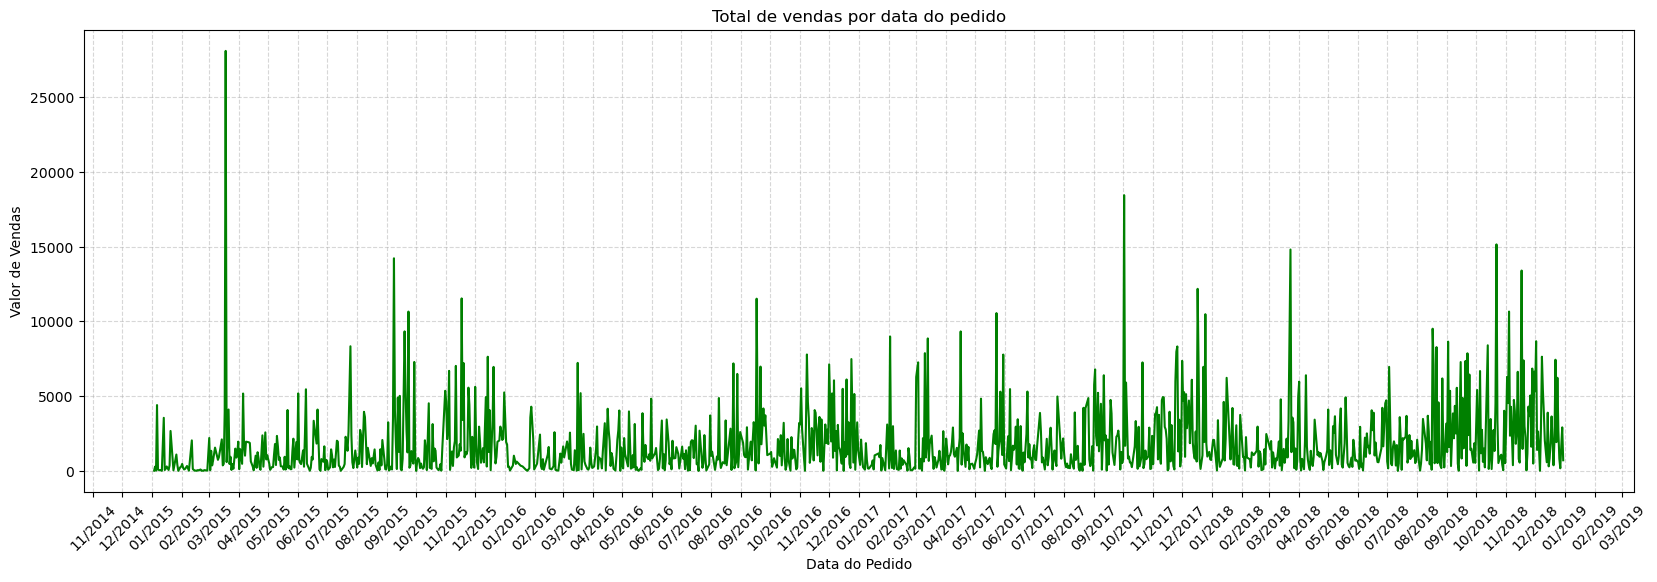

In [21]:
# Plotar o gráfico
plt.figure(figsize=(20, 6))
plt.plot(vend_total_pdata.index, vend_total_pdata.values, color='green')

# Customizar o eixo X para exibir no formato mês/ano
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))  # Exibe um rótulo por mês

# Ajustar o layout
plt.title('Total de vendas por data do pedido')
plt.xlabel('Data do Pedido')
plt.ylabel('Valor de Vendas')
plt.xticks(rotation=45)  # Rotaciona os rótulos para melhor leitura
plt.grid(visible=True, linestyle='--', alpha=0.5)  # Adiciona grades leves
plt.show()

### Pergunta de Negócio 3 - Qual o Total de Vendas por Estado???

In [22]:
vend_p_estado1 = df_bi.groupby('Estado')['Valor_Venda'].sum().reset_index()
vend_p_estado1.head()

,Estado,Valor_Venda
0,Alabama,19510.6400
1,Arizona,35272.6570
2,Arkansas,11673.8300
3,California,442927.0975
4,Colorado,31841.5980


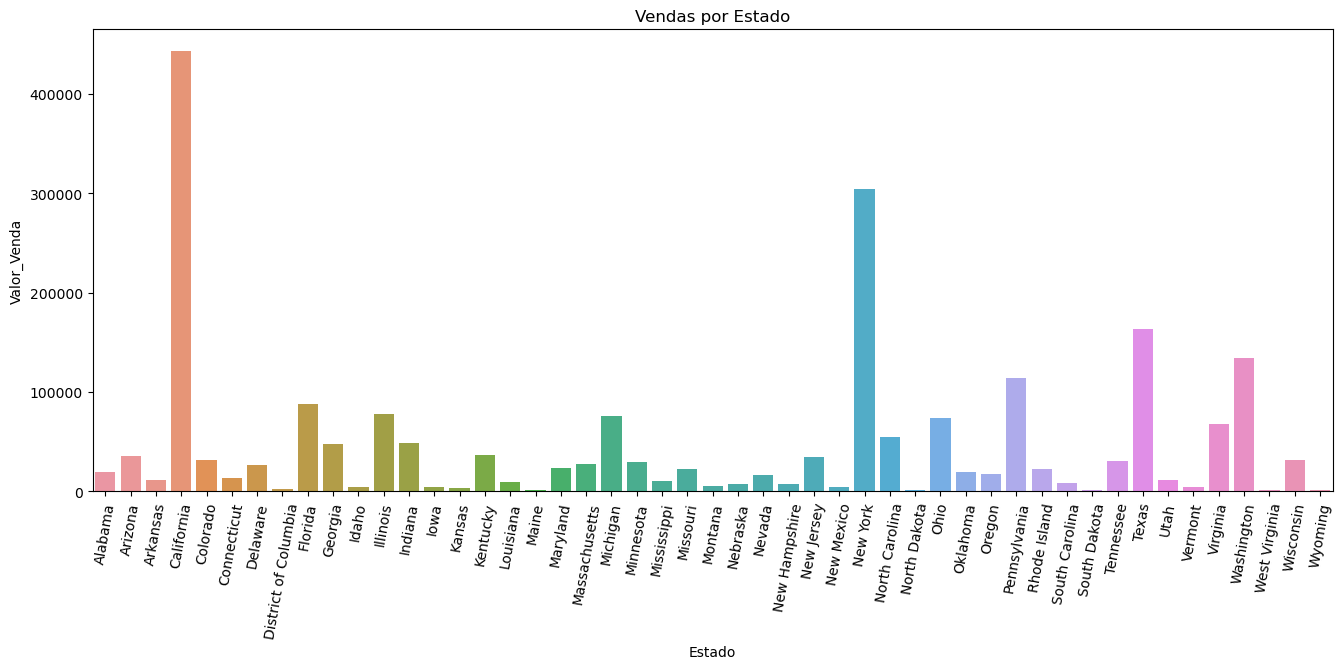

In [23]:
plt.figure(figsize = (16,6))
sns.barplot(data = vend_p_estado1,
           y = 'Valor_Venda',
           x = 'Estado').set(title = 'Vendas por Estado')
plt.xticks(rotation = 80)
plt.show()


### Pergunta de Negócio 4 - Quais São as 10 Cidades com Maior Total de Vendas????

In [24]:
top_vendas = df_bi.groupby('Cidade')['Valor_Venda'].sum()
top_vendas1 = top_vendas.sort_values(ascending=False).head(10)
top_vendas.sort_values(ascending = False).head(10)

top_vendas_df = top_vendas1.reset_index()  
top_vendas_df.columns = ['Cidade', 'Valor_Venda']  
top_vendas_df


,Cidade,Valor_Venda
0,New York City,251749.2190
1,Los Angeles,171654.6330
2,Seattle,114725.4780
3,San Francisco,107489.9520
4,Philadelphia,107197.8030
5,Houston,61590.1868
6,San Diego,47458.3790
7,Chicago,46974.3430
8,Jacksonville,44713.1830
9,Detroit,42446.9440


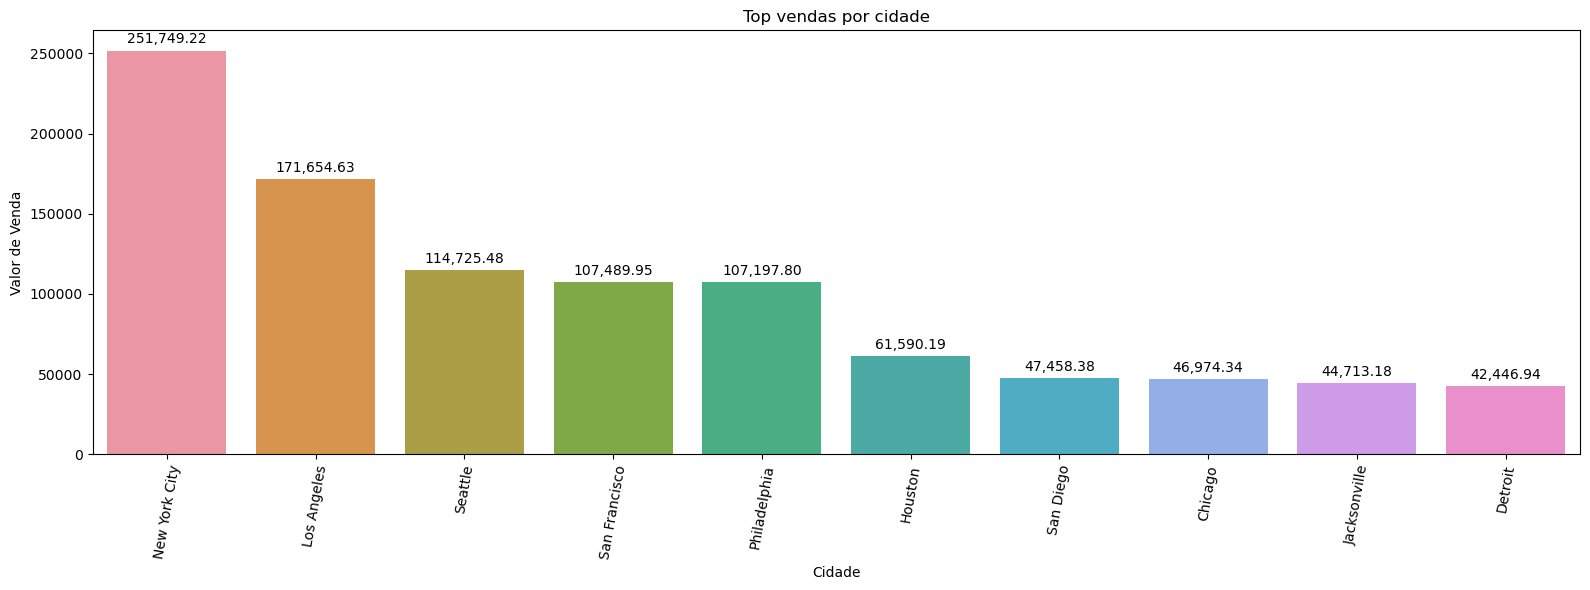

In [25]:

# Plotar o gráfico
plt.figure(figsize=(16, 6))
sns.set_palette('coolwarm')

# Criar o gráfico de barras
ax = sns.barplot(data=top_vendas_df, x='Cidade', y='Valor_Venda')

# Configurar título e rótulos
ax.set_title('Top vendas por cidade')
ax.set_ylabel('Valor de Venda')
ax.set_xlabel('Cidade')

# Adicionar os valores nas barras
for p in ax.patches:
    ax.text(
        p.get_x() + p.get_width() / 2,  # Centro da barra
        p.get_height() + 0.01 * max(top_vendas_df['Valor_Venda']),  # Um pouco acima da barra
        f"{p.get_height():,.2f}",  # Formatar o valor
        ha='center',  # Alinhamento horizontal
        va='bottom',  # Alinhamento vertical
        fontsize=10,  # Tamanho da fonte
        color='black'  # Cor do texto
    )

# Configurar rotação das labels no eixo X
plt.xticks(rotation=80)
plt.tight_layout()
plt.show()

### Pergunta de Negócio 5 - Qual Segmento Teve o Maior Total de Vendas?????

In [26]:
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '$ {v:d}'. format(v = val)
    return my_format

In [27]:
top_seg = df_bi.groupby('Segmento')['Valor_Venda'].sum().reset_index()
cid_top_seg = top_seg.loc[top_seg['Valor_Venda'].idxmax()]
print(cid_top_seg)

Segmento          Consumer
Valor_Venda    1133834.335
Name: 0, dtype: object


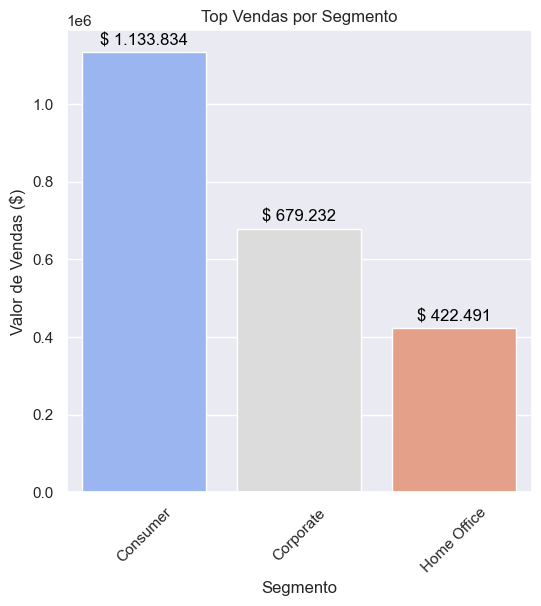

In [44]:
# Tamanho do gráfico
plt.figure(figsize=(6, 6))

# Gráfico de barras vertical
ax = sns.barplot(data=top_seg, x='Segmento', y='Valor_Venda', palette='coolwarm')

# Adicionar os valores acima das barras
for index, row in top_seg.iterrows():
    ax.text(
        index,  # Posição X (índice do segmento)
        row['Valor_Venda'] + 0.01 * max(top_seg['Valor_Venda']),  # Posição Y (um pouco acima da barra)
        f"$ {int(row['Valor_Venda']):,}".replace(",", "."),  # Formatação do valor
        color='black',  # Cor do texto
        ha='center',  # Alinhamento horizontal
        va='bottom'  # Alinhamento vertical
    )

# Título e ajustes
plt.title('Top Vendas por Segmento')
plt.xlabel('Segmento')
plt.ylabel('Valor de Vendas ($)')
plt.xticks(rotation=45)  # Rotação dos rótulos no eixo X
plt.show()

### Pergunta de Negócio 6 - Qual o Total de Vendas Por Segmento e Por Ano??????

In [29]:
df_bi['Ano'] = df_bi['Data_Pedido'].dt.year
df_bi.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016


In [30]:
vend_sa = round(df_bi.groupby(['Ano', 'Segmento'])['Valor_Venda'].sum(),2)
vend_sa

Ano   Segmento   
2015  Consumer       256719.92
      Corporate      125819.60
      Home Office     88229.09
2016  Consumer       265295.26
      Corporate      114643.12
      Home Office     74134.13
2017  Consumer       288459.56
      Corporate      203266.74
      Home Office    103639.63
2018  Consumer       323359.60
      Corporate      235502.73
      Home Office    156488.58
Name: Valor_Venda, dtype: float64

### Pergunta de Negócio 7 - Os gestores da empresa estão considerando conceder diferentes faixas de descontos e gostariam de fazer uma simulação com base na regra abaixo:

- Se o Valor_Venda for maior que 1000 recebe 15% de desconto.
- Se o Valor_Venda for menor que 1000 recebe 10% de desconto.

### Quantas Vendas Receberiam 15% de Desconto?

In [31]:
df_bi15 = df_bi[df_bi['Valor_Venda'] > 1000].count()
df_bi15

ID_Pedido       457
Data_Pedido     457
ID_Cliente      457
Segmento        457
Pais            457
Cidade          457
Estado          457
ID_Produto      457
Categoria       457
SubCategoria    457
Valor_Venda     457
Ano             457
dtype: int64

In [32]:
df_bi10 = df_bi[df_bi['Valor_Venda'] < 1000].count()
df_bi10

ID_Pedido       9243
Data_Pedido     9243
ID_Cliente      9243
Segmento        9243
Pais            9243
Cidade          9243
Estado          9243
ID_Produto      9243
Categoria       9243
SubCategoria    9243
Valor_Venda     9243
Ano             9243
dtype: int64

In [33]:
df_bi['Desconto'] = np.where(df_bi['Valor_Venda'] > 1000, 0.15, 0.10)
df_bi['Desconto'].value_counts()
#Bateu

0.10    9243
0.15     457
Name: Desconto, dtype: int64

### Pergunta de Negócio 8 - Considere Que a Empresa Decida Conceder o Desconto de 15% do Item Anterior. Qual Seria a Média do Valor de Venda Antes e Depois do Desconto?

In [34]:
df_bi['Valor_Após_D1'] = df_bi['Valor_Venda'] * (1 - df_bi['Desconto']) #Primeiro desconto

In [35]:
df_antes_desconto = df_bi.loc[df_bi['Desconto'] == 0.15, 'Valor_Venda']
df_depois_desconto = df_bi.loc[df_bi['Desconto'] == 0.15, 'Valor_Após_D1']
med_df_antes_desconto = df_antes_desconto.mean()
med_df_depois_desconto = df_depois_desconto.mean()

In [36]:
print("Média de antes do desconto", round(med_df_antes_desconto,2))

Média de antes do desconto 2116.81


In [37]:
print("Média de depois do desconto", round(med_df_depois_desconto,2))

Média de depois do desconto 1799.29


In [38]:
dif_med = med_df_antes_desconto - med_df_depois_desconto
print(round(dif_med, 2))

317.52


### Pergunta de Negócio 9 - Qual o Média de Vendas Por Segmento, Por Ano e Por Mês?
Demonstre o resultado através de gráfico de linha.

In [39]:
df_bi['Mês'] = df_bi['Data_Pedido'].dt.month
df_med_sam = df_bi.groupby(['Ano', 'Mês', 'Segmento'])['Valor_Venda'].agg([np.sum, np.mean, np.median]) #Agregar
df_med_sam

sum        mean  median
Ano  Mês Segmento                                   
2015 1   Consumer      6896.6290  146.736787  36.440
         Corporate     1701.5280  130.886769  51.940
         Home Office   5607.5500  329.855882  62.820
     2   Consumer      3167.8540  117.327926  22.776
         Corporate      623.1180   69.235333  62.310
...                          ...         ...     ...
2018 11  Corporate    44357.9862  341.215278  79.530
         Home Office  24009.3840  247.519423  56.560
     12  Consumer     48107.4558  183.616244  52.533
         Corporate    20524.4320  153.167403  46.460
         Home Office  13022.3910  224.523983  49.260

[144 rows x 3 columns]

In [40]:
anos = df_med_sam.index.get_level_values(0)
meses = df_med_sam.index.get_level_values(1)
segmentos = df_med_sam.index.get_level_values(2)

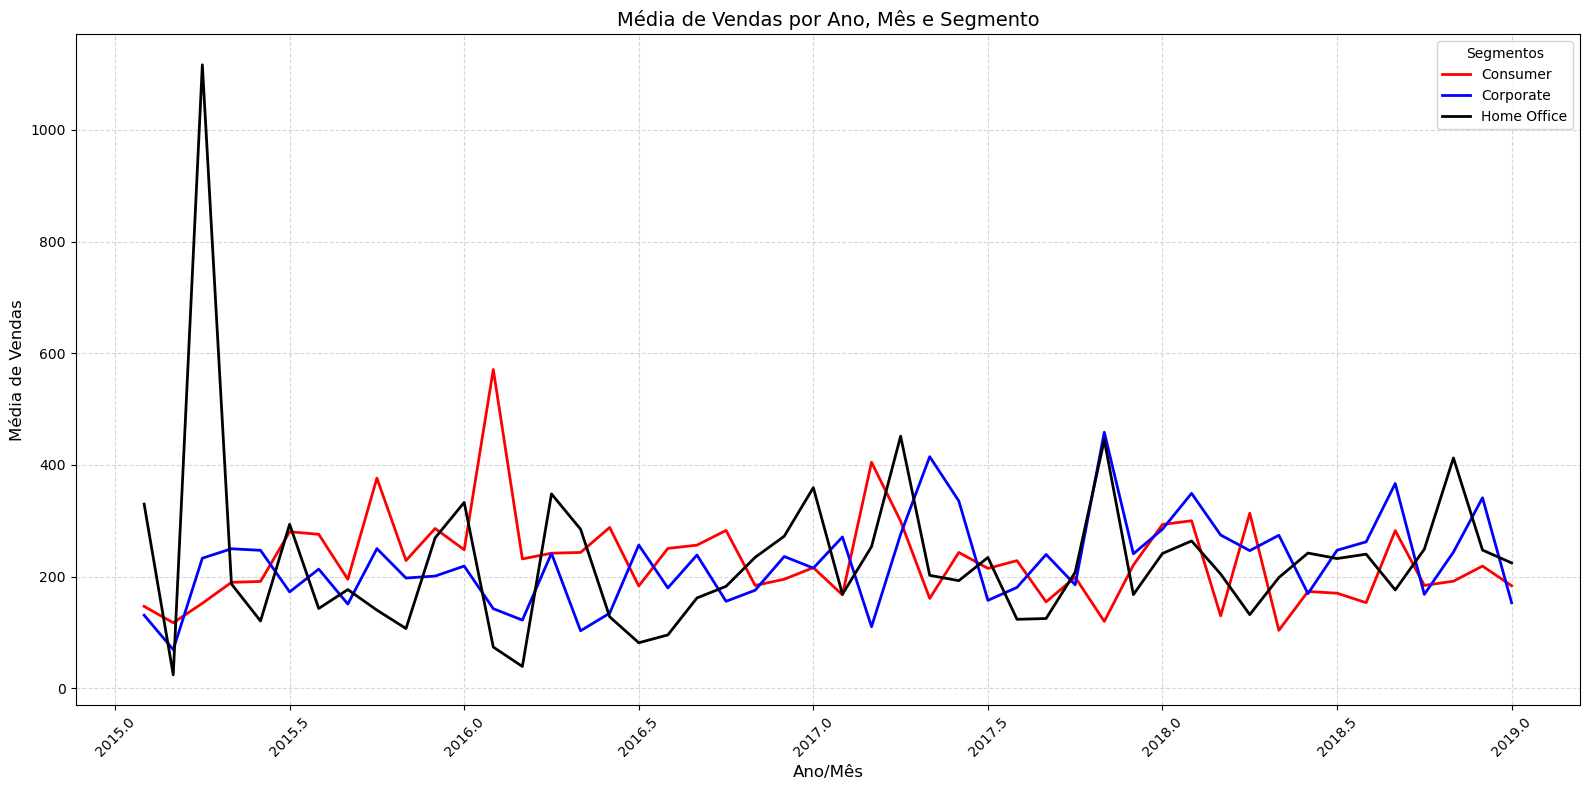

In [41]:
df_medias = df_med_sam['mean'].reset_index()

cores = {
    'Consumer': 'red',  
    'Corporate': 'blue',
    'Home Office': 'black'
}


plt.figure(figsize=(16, 8))

for segmento, cor in cores.items():
    df_segmento = df_medias[df_medias['Segmento'] == segmento]
    plt.plot(
        df_segmento['Ano'] + df_segmento['Mês'] / 12, 
        df_segmento['mean'], 
        label=segmento,
        color=cor,  
        linewidth=2  
    )

plt.title('Média de Vendas por Ano, Mês e Segmento', fontsize=14)
plt.xlabel('Ano/Mês', fontsize=12)
plt.ylabel('Média de Vendas', fontsize=12)
plt.legend(title='Segmentos', fontsize=10)
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

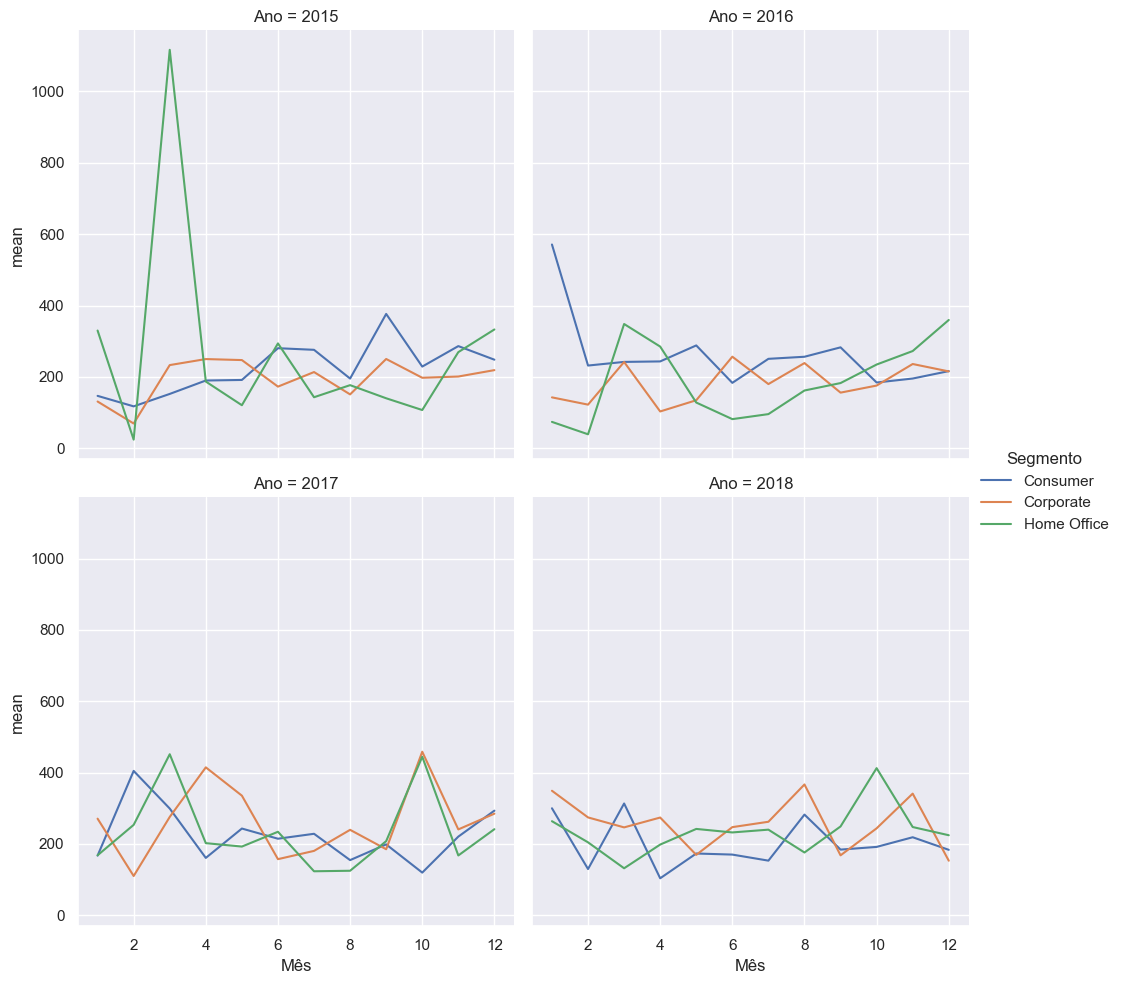

In [42]:
plt.figure(figsize = (12, 6))
sns.set()
fig1 = sns.relplot(kind = 'line',
                   data = df_med_sam, 
                   y = 'mean', 
                   x = meses,
                   hue = segmentos, 
                   col = anos,
                   col_wrap = 2)
plt.show()

### Pergunta de Negócio 10 -  Qual o Total de Vendas Por Categoria e SubCategoria, Considerando Somente as Top 12 SubCategorias? 

Demonstre tudo através de um único gráfico.

In [45]:
df_dsa_p10 = df_bi.groupby(['Categoria',
                             'SubCategoria']).sum(numeric_only = True).sort_values('Valor_Venda',
                                                                                   ascending = False).head(12)

In [46]:
df_dsa_p10 = df_dsa_p10[['Valor_Venda']].astype(int).sort_values(by = 'Categoria').reset_index()

In [47]:
df_dsa_p10

,Categoria,SubCategoria,Valor_Venda
0,Furniture,Chairs,317919
1,Furniture,Tables,202083
2,Furniture,Bookcases,108045
3,Furniture,Furnishings,88862
4,Office Supplies,Storage,216188
5,Office Supplies,Binders,194723
6,Office Supplies,Appliances,104061
7,Office Supplies,Paper,76312
8,Technology,Phones,325271
9,Technology,Machines,189238


In [48]:
df_dsa_p10_cat = df_dsa_p10.groupby('Categoria').sum(numeric_only = True).reset_index()
df_dsa_p10_cat

,Categoria,Valor_Venda
0,Furniture,716909
1,Office Supplies,591284
2,Technology,823548


In [49]:
cores_categorias = ['#5d00de',
                    '#0ee84f',
                    '#e80e27']
cores_subcategorias = ['#aa8cd4',
                       '#aa8cd5',
                       '#aa8cd6',
                       '#aa8cd7',
                       '#26c957',
                       '#26c958',
                       '#26c959',
                       '#26c960',
                       '#e65e65',
                       '#e65e66',
                       '#e65e67',
                       '#e65e68']

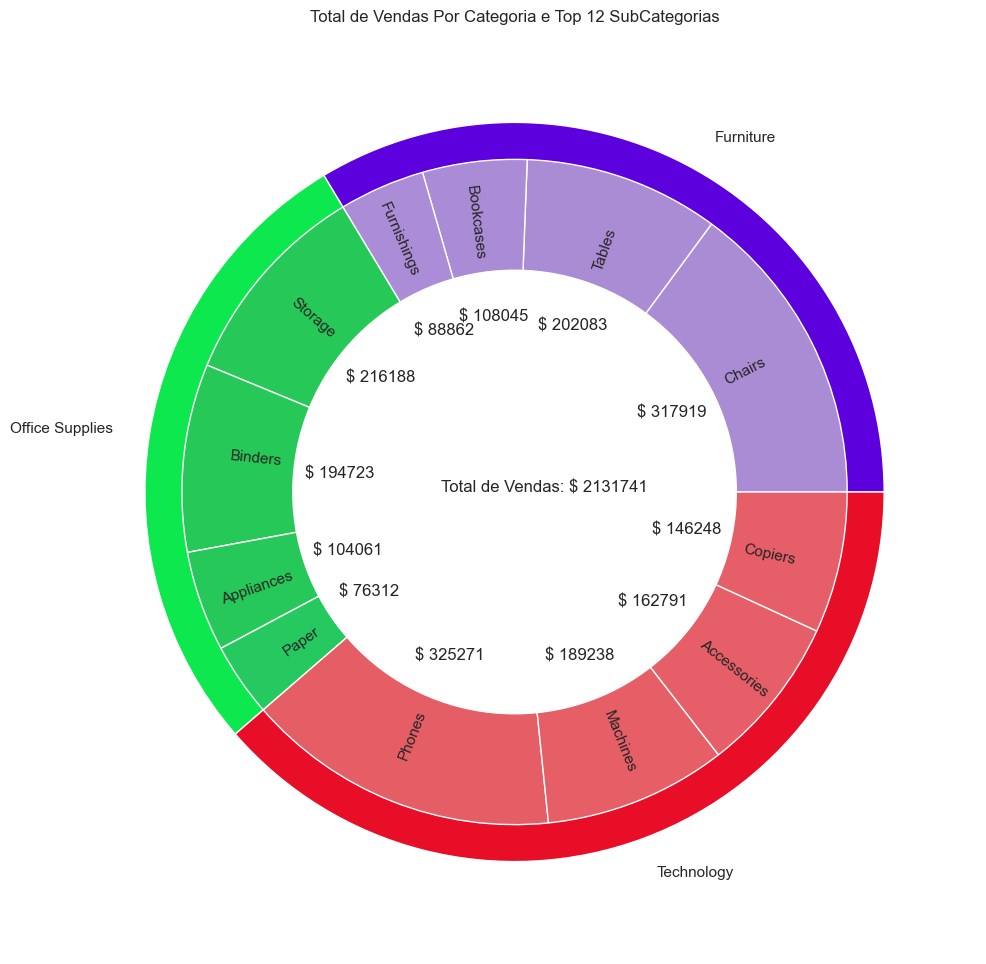

In [50]:
# Tamanho da figura
fig, ax = plt.subplots(figsize = (18,12))

# Gráfico das categorias
p1 = ax.pie(df_dsa_p10_cat['Valor_Venda'], 
            radius = 1,
            labels = df_dsa_p10_cat['Categoria'],
            wedgeprops = dict(edgecolor = 'white'),
            colors = cores_categorias)

# Gráfico das subcategorias
p2 = ax.pie(df_dsa_p10['Valor_Venda'],
            radius = 0.9,
            labels = df_dsa_p10['SubCategoria'],
            autopct = autopct_format(df_dsa_p10['Valor_Venda']),
            colors = cores_subcategorias, 
            labeldistance = 0.7,
            wedgeprops = dict(edgecolor = 'white'), 
            pctdistance = 0.53,
            rotatelabels = True)

# Limpa o centro do círculo
centre_circle = plt.Circle((0, 0), 0.6, fc = 'white')

# Labels e anotações
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.annotate(text = 'Total de Vendas: ' + '$ ' + str(int(sum(df_dsa_p10['Valor_Venda']))), xy = (-0.2, 0))
plt.title('Total de Vendas Por Categoria e Top 12 SubCategorias')
plt.show()